In [1]:
import mne
import numpy as np
from mindaffectBCI.decoder.offline.load_mindaffectBCI import load_mindaffectBCI_raw_mne, make_onset_offset_events
from mindaffectBCI.decoder.utils import askloadsavefile
import os
import matplotlib.pyplot as plt

#%matplotlib Widget
%load_ext autoreload
%autoreload 2
#%matplotlib Widget
plt.rcParams['figure.figsize'] = [12, 8] # bigger default figures

## select the save-file to analyse

In [2]:
# load savefile
savefile = askloadsavefile(initialdir=os.getcwd())
print(savefile)

C:/Users/Developer/Desktop/mark/noisetag_bci/mindaffectBCI_noisetag_bci_201029_1340_ganglion.txt


### (Optional) Manually over-ride the channel names if not given in save-file

In [ ]:
# channel names, BP r-NET
ch_names=["Fp1","Fz","F3","F7","F9","FC5","FC1","C3","T7","CP5","CP1","Pz","P3","P7","P9","O1","Oz","O2","P10","P8","P4","CP2","CP6","T8","C4","Cz","FC2","FC6","F10","F8","F4","Fp2"]

In [ ]:
if 'fakedata' in savefile:
    ch_names = ['Cz','Cpz','O1','O2']

## Load the savefile in MNE raw format + meta-info and event-id spec

### Note: on event_id's
The event_id has a unique name for each combination of (non-zero) object-ID and stimulus level, written as "oX/lY/ATT" where X is the object-ID and Y is the stimulus level, and ATT is 'tgt' for *true targets* and attended objects and 'nt' for non-attended targets objects.

In the c-VEP speller, each virtual-keyboard button has it's own object ID -- but this may change between trials.  

Importantly, object-ID == 0, is special and (when known) *always* represents the stimulus state of the current target object.

Thus, event_id 'o0/l1/tt' codes for when the current attended target has high intensity, i.e. is 'flashed'.

In [16]:
raw, event_id = load_mindaffectBCI_raw_mne(savefile, ch_names=ch_names if "ch_names" in locals() else None)
print(raw)
print(raw.info)
print(event_id)

Ch: ['']
X=(101926, 4) @200.0Hz
Creating RawArray with float64 data, n_channels=31, n_times=101926
    Range : 0 ... 101925 =      0.000 ...   509.625 secs
Ready.
<RawArray | 31 x 101926 (509.6 s), ~24.1 MB, data loaded>
<Info | 8 non-empty values
 bads: []
 ch_names: , 1, 2, 3, o0, o1, o2, o3, o4, o5, o6, o7, o8, o9, o10, o11, ...
 chs: 1 EEG, 3 BIO, 27 STIM
 custom_ref_applied: False
 dig: 3 items (3 Cardinal)
 highpass: 0.0 Hz
 lowpass: 100.0 Hz
 meas_date: unspecified
 nchan: 31
 projs: []
 sfreq: 200.0 Hz
>
{'o0/l1/tgt': 1, 'o0/l1/nt': 501, 'o1/l1/tgt': 11, 'o1/l1/nt': 511, 'o2/l1/tgt': 21, 'o2/l1/nt': 521, 'o3/l1/tgt': 31, 'o3/l1/nt': 531, 'o4/l1/tgt': 41, 'o4/l1/nt': 541, 'o5/l1/tgt': 51, 'o5/l1/nt': 551, 'o6/l1/tgt': 61, 'o6/l1/nt': 561, 'o7/l1/tgt': 71, 'o7/l1/nt': 571, 'o8/l1/tgt': 81, 'o8/l1/nt': 581, 'o9/l1/tgt': 91, 'o9/l1/nt': 591, 'o10/l1/tgt': 101, 'o10/l1/nt': 601, 'o11/l1/tgt': 111, 'o11/l1/nt': 611, 'o12/l1/tgt': 121, 'o12/l1/nt': 621, 'o13/l1/tgt': 131, 'o13/l1/nt':

Effective window size : 10.240 (s)
Need more than one channel to make topography for eeg. Disabling interactivity.


C:\Users\DEVELO~1\AppData\Local\Temp/ipykernel_30040/1319345158.py:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.plot_psd(fmin=0,fmax=40);


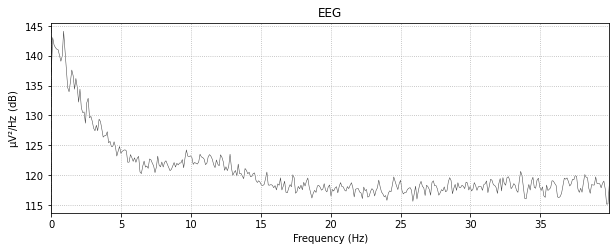

In [17]:
raw.plot_psd(fmin=0,fmax=40);

## Spectral filtering and downsampling

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1.5 - 25 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.50, 25.00 Hz: -6.02, -6.02 dB

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 1321 samples (6.605 sec)

3928 events found
Event IDs: [1]
3902 events found
Event IDs: [ 11 500 511]
3953 events found
Event IDs: [500 521]
4301 events found
Event IDs: [ 31 500 531]
3624

C:\Users\DEVELO~1\AppData\Local\Temp/ipykernel_30040/646283100.py:2: RuntimeWarning: Some events are duplicated in your different stim channels. 23 events were ignored during deduplication.
  data=raw.filter(l_freq=1.5, h_freq=25, method='iir').notch_filter((50)).resample(sfreq=100)


3928 events found
Event IDs: [1]
3902 events found
Event IDs: [ 11 500 511]
3953 events found
Event IDs: [500 521]
4301 events found
Event IDs: [ 31 500 531]
3624 events found
Event IDs: [500 541]
3968 events found
Event IDs: [ 51 500 551]
3963 events found
Event IDs: [500 561]
3639 events found
Event IDs: [ 71 500 571]
3889 events found
Event IDs: [ 81 500 581]
3960 events found
Event IDs: [500 591]
3884 events found
Event IDs: [101 500 601]
3966 events found
Event IDs: [500 611]
3885 events found
Event IDs: [121 500 621]
3978 events found
Event IDs: [131 500 631]
4311 events found
Event IDs: [500 641]
3974 events found
Event IDs: [151 500 651]
3887 events found
Event IDs: [161 500 661]
3967 events found
Event IDs: [171 500 671]
3968 events found
Event IDs: [500 681]
4213 events found
Event IDs: [191 500 691]
3970 events found
Event IDs: [201 500 701]
3640 events found
Event IDs: [211 500 711]
3965 events found
Event IDs: [221 500 721]
3881 events found
Event IDs: [231 500 731]
3966 e

C:\Users\DEVELO~1\AppData\Local\Temp/ipykernel_30040/646283100.py:2: RuntimeWarning: Some events are duplicated in your different stim channels. 23 events were ignored during deduplication.
  data=raw.filter(l_freq=1.5, h_freq=25, method='iir').notch_filter((50)).resample(sfreq=100)
C:\Users\DEVELO~1\AppData\Local\Temp/ipykernel_30040/646283100.py:2: RuntimeWarning: Resampling of the stim channels caused event information to become unreliable. Consider finding events on the original data and passing the event matrix as a parameter.
  data=raw.filter(l_freq=1.5, h_freq=25, method='iir').notch_filter((50)).resample(sfreq=100)
C:\Users\DEVELO~1\AppData\Local\Temp/ipykernel_30040/646283100.py:3: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  data.plot_psd(fmax=50)


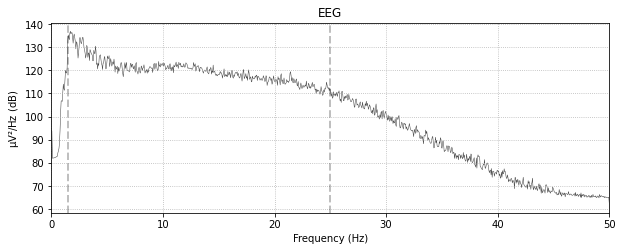

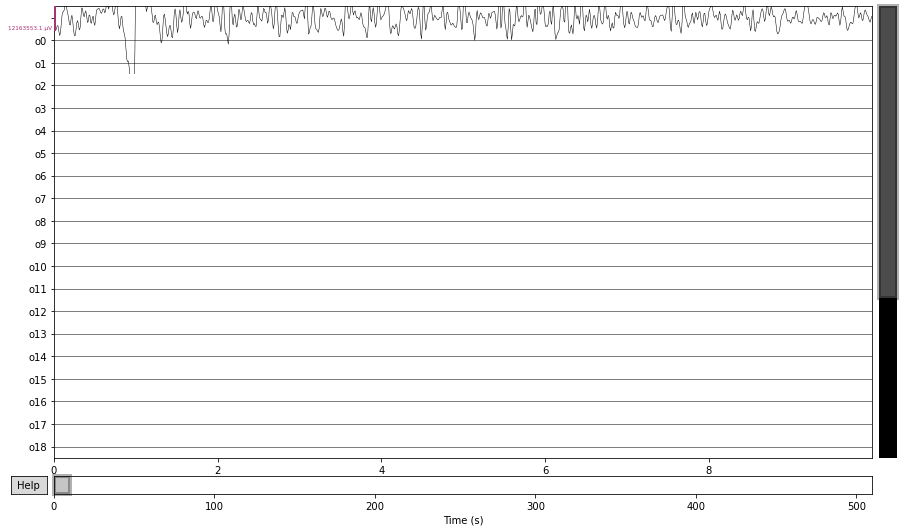

In [18]:
# filter and downsample
data=raw.filter(l_freq=1.5, h_freq=25, method='iir').notch_filter((50)).resample(sfreq=100)
data.plot_psd(fmax=50)           
data.plot(scalings='auto', duration=10, proj=False, remove_dc=True);

## EOG artifact removal

In [19]:
# list of channel names to treat as pure artifact channels
artifact_ch = ['Fp2','Fp1','F9','F10']

In [20]:
eeg_ch = [data.info.ch_names[i] for i in mne.pick_types(data.info,eeg=True)] # get EEG ch indices
nonartifact_ch = [ c for c in eeg_ch if not c in artifact_ch ]
artifact_ch = [ c for c in eeg_ch if c in artifact_ch ]

In [21]:
# Regress out artifact channels -- if we have any
if artifact_ch :
    _, betas = mne.preprocessing.regress_artifact(data, picks_artifact=artifact_ch,picks=nonartifact_ch)
    data, _ = mne.preprocessing.regress_artifact(data, betas=betas, picks_artifact=artifact_ch, picks=nonartifact_ch)
    # mark the EOG channels as 'bad'
    data.info['bads'].extend(artifact_ch)
    print(data.info)

## Slice into Epochs

In [22]:
# get events and create a event dict
events, event_id = make_onset_offset_events(data,event_id)
print(event_id)

3928 events found
Event IDs: [1]
3902 events found
Event IDs: [ 11 500 511]
3953 events found
Event IDs: [500 521]
4301 events found
Event IDs: [ 31 500 531]
3624 events found
Event IDs: [500 541]
3968 events found
Event IDs: [ 51 500 551]
3963 events found
Event IDs: [500 561]
3639 events found
Event IDs: [ 71 500 571]
3889 events found
Event IDs: [ 81 500 581]
3960 events found
Event IDs: [500 591]
3884 events found
Event IDs: [101 500 601]
3966 events found
Event IDs: [500 611]
3885 events found
Event IDs: [121 500 621]
3978 events found
Event IDs: [131 500 631]
4311 events found
Event IDs: [500 641]
3974 events found
Event IDs: [151 500 651]
3887 events found
Event IDs: [161 500 661]
3967 events found
Event IDs: [171 500 671]
3968 events found
Event IDs: [500 681]
4213 events found
Event IDs: [191 500 691]
3970 events found
Event IDs: [201 500 701]
3640 events found
Event IDs: [211 500 711]
3965 events found
Event IDs: [221 500 721]
3881 events found
Event IDs: [231 500 731]
3966 e

c:\users\developer\desktop\private\mindaffectBCI\decoder\offline\load_mindaffectBCI.py:335: RuntimeWarning: Some events are duplicated in your different stim channels. 23 events were ignored during deduplication.
  onset_events = mne.find_events(data,output='onset')


{'o0/l1/tgt/onset': 1, 'o0/l1/nt/onset': 501, 'o1/l1/tgt/onset': 11, 'o1/l1/nt/onset': 511, 'o2/l1/tgt/onset': 21, 'o2/l1/nt/onset': 521, 'o3/l1/tgt/onset': 31, 'o3/l1/nt/onset': 531, 'o4/l1/tgt/onset': 41, 'o4/l1/nt/onset': 541, 'o5/l1/tgt/onset': 51, 'o5/l1/nt/onset': 551, 'o6/l1/tgt/onset': 61, 'o6/l1/nt/onset': 561, 'o7/l1/tgt/onset': 71, 'o7/l1/nt/onset': 571, 'o8/l1/tgt/onset': 81, 'o8/l1/nt/onset': 581, 'o9/l1/tgt/onset': 91, 'o9/l1/nt/onset': 591, 'o10/l1/tgt/onset': 101, 'o10/l1/nt/onset': 601, 'o11/l1/tgt/onset': 111, 'o11/l1/nt/onset': 611, 'o12/l1/tgt/onset': 121, 'o12/l1/nt/onset': 621, 'o13/l1/tgt/onset': 131, 'o13/l1/nt/onset': 631, 'o14/l1/tgt/onset': 141, 'o14/l1/nt/onset': 641, 'o15/l1/tgt/onset': 151, 'o15/l1/nt/onset': 651, 'o16/l1/tgt/onset': 161, 'o16/l1/nt/onset': 661, 'o17/l1/tgt/onset': 171, 'o17/l1/nt/onset': 671, 'o18/l1/tgt/onset': 181, 'o18/l1/nt/onset': 681, 'o19/l1/tgt/onset': 191, 'o19/l1/nt/onset': 691, 'o20/l1/tgt/onset': 201, 'o20/l1/nt/onset': 701, '

C:\Users\DEVELO~1\AppData\Local\Temp/ipykernel_30040/2202598099.py:2: RuntimeWarning: event 500 missing from event_id will be ignored
  fig = mne.viz.plot_events(events, event_id=event_id, sfreq=raw.info['sfreq'],
C:\Users\DEVELO~1\AppData\Local\Temp/ipykernel_30040/2202598099.py:2: RuntimeWarning: event 1500 missing from event_id will be ignored
  fig = mne.viz.plot_events(events, event_id=event_id, sfreq=raw.info['sfreq'],
C:\Users\DEVELO~1\AppData\Local\Temp/ipykernel_30040/2202598099.py:2: RuntimeWarning: More events than default colors available. You should pass a list of unique colors.
  fig = mne.viz.plot_events(events, event_id=event_id, sfreq=raw.info['sfreq'],


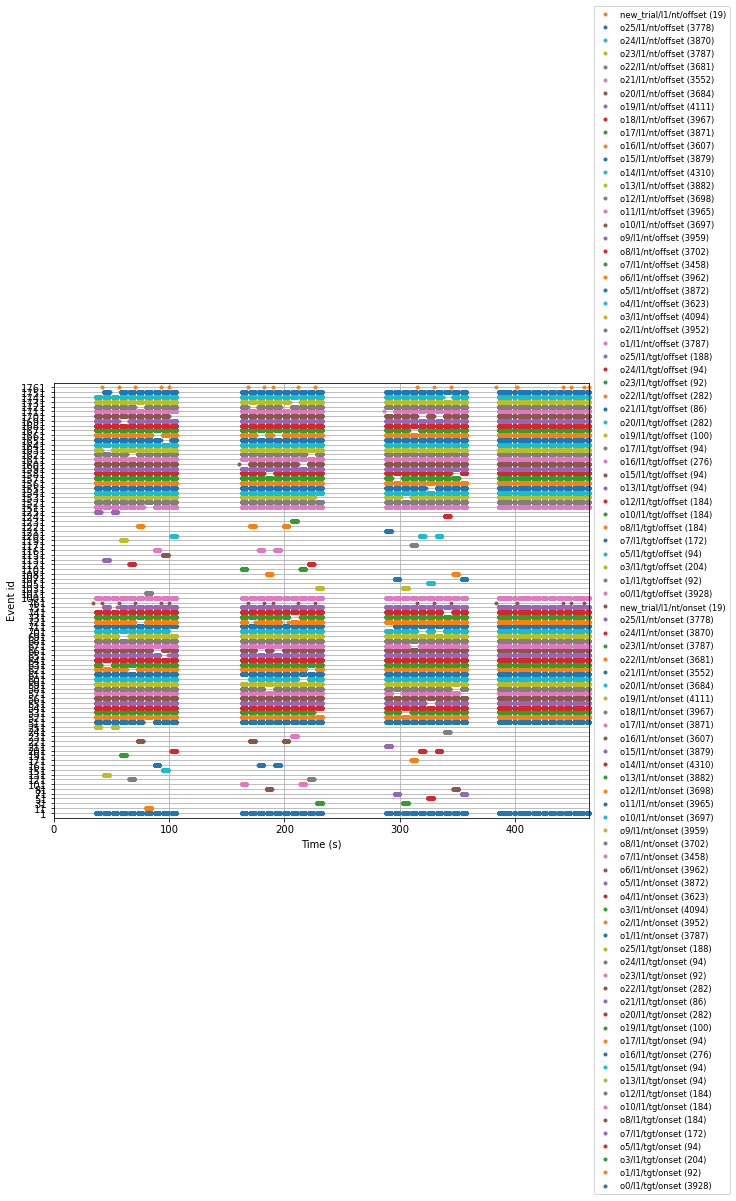

In [23]:
#plot events
fig = mne.viz.plot_events(events, event_id=event_id, sfreq=raw.info['sfreq'],
                          first_samp=raw.first_samp, on_missing='ignore')

## slice into epochs on onset/offset of the target

In [30]:
# make epoch object
tmin = -.1
tmax = .55

# only select events from the target object(s), and not o0
target_event_id = {k:v for k,v in event_id.items() if 'tgt'in k and not 'o0' in k}

target_epochs = mne.Epochs(data, events, event_id=target_event_id, tmin=tmin, tmax=tmax, baseline=(None,None), detrend=1, event_repeated='merge', on_missing='ignore')

Not setting metadata
Not setting metadata
5592 matching events found
Setting baseline interval to [-0.1, 0.55] sec
Applying baseline correction (mode: mean)
0 projection items activated


## Plot ERPs to onset/offset

No projector specified for this dataset. Please consider the method self.add_proj.
Need more than one channel to make topography for eeg. Disabling interactivity.


C:\Users\DEVELO~1\AppData\Local\Temp/ipykernel_30040/450643447.py:2: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  target_onset_evoked.plot_joint(times='peaks',title='Target Onset', exclude='bads');


RuntimeError: Did not find any digitization points of kind FIFFV_POINT_EEG (3) in the info.

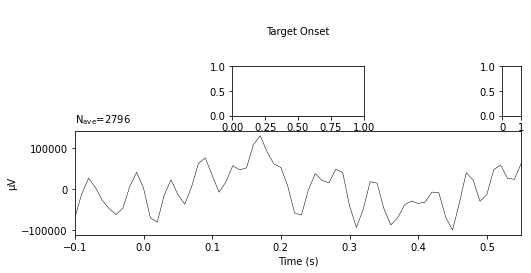

In [31]:
target_onset_evoked = target_epochs['onset'].average()
target_onset_evoked.plot_joint(times='peaks',title='Target Onset', exclude='bads');

No projector specified for this dataset. Please consider the method self.add_proj.
Need more than one channel to make topography for eeg. Disabling interactivity.


C:\Users\DEVELO~1\AppData\Local\Temp/ipykernel_30040/327377764.py:2: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  target_offset_evoked.plot_joint(times='peaks',title='Target Offset', exclude='bads');


RuntimeError: Did not find any digitization points of kind FIFFV_POINT_EEG (3) in the info.

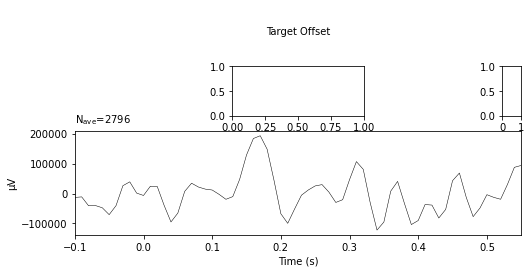

In [32]:
target_offset_evoked = target_epochs['offset'].average()
target_offset_evoked.plot_joint(times='peaks',title='Target Offset', exclude='bads');

## Topographic plot for onset/offset events

In [ ]:
# plot topo
mne.viz.plot_evoked_topo([target_onset_evoked, target_offset_evoked], background_color='w');

## comparsion of the evoked responses

In [ ]:
mne.viz.plot_compare_evokeds(dict(onset=target_onset_evoked, offset=target_offset_evoked),
                             legend='upper left', show_sensors='upper right',combine='mean');

## Permutation cluster test significant differences

In [ ]:
# cluster-based permutation test with Threshold-Free Cluster Enhancement (TFCE)
from mne.channels import find_ch_adjacency, make_1020_channel_selections
from mne.stats import spatio_temporal_cluster_test


#pick only EEG channels (because we use get_data() later which otherwise gives the whole data matrix inlcuding stim info channels)
target_onset_epochs.load_data().pick_types(eeg=True)
target_offset_epochs.load_data().pick_types(eeg=True)

# compute spatial adjaceny matrix for the channels
adjacency, ch_names = find_ch_adjacency(target_onset_epochs.info, ch_type='eeg')


# Extract data: transpose because the cluster test requires channels to be last
# In this case, inference is done over items. In the same manner, we could
# also conduct the test over, e.g., subjects.
X = [target_onset_epochs.get_data().transpose(0, 2, 1),
     target_offset_epochs.get_data().transpose(0, 2, 1)]

# Calculate statistical thresholds
tfce = dict(start=.2, step=.2)
t_obs, clusters, cluster_pv, h0 = spatio_temporal_cluster_test(
    X, tfce, adjacency=adjacency,
    n_permutations=100)  # a more standard number would be 1000+
significant_points = cluster_pv.reshape(t_obs.shape).T < .05
print(str(significant_points.sum()) + " points selected by TFCE ...")

In [ ]:
# We need an evoked object to plot the image to be masked
evoked = mne.combine_evoked([target_onset_evoked, target_offset_evoked],
                            weights=[1, -1])  # calculate difference wave
time_unit = dict(time_unit="s")
evoked.plot_joint(title="onset vs. offset", ts_args=time_unit,
                  topomap_args=time_unit);  # show difference wave

In [ ]:
# Visualize the cluster test results
evoked.plot_image(colorbar=False, show=False,
                  mask=significant_points, show_names="all", titles=None,
                  **time_unit);